<a href="https://colab.research.google.com/github/tawseeq1/cognitive-distortions/blob/main/topicmodelling_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import random

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq')
import targetwords
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_comments_original_sgexams  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/sgexams_comments_Oct2023.csv')
data_posts_original_sgexams  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/sgexams_posts_Oct2023.csv')
data_comments_teen_original1  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/teen_sampled_comments_1.csv')
data_comments_teen_original2  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/teen_sampled_comments_2.csv')
data_comments_teen_original3  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/teen_sampled_comments_3.csv', on_bad_lines='skip', engine='python')
data_comments_teen_original4  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/teen_sampled_comments_4.csv', on_bad_lines='skip', engine='python')

data_posts_original_teen  = pd.read_csv('/content/drive/MyDrive/Cognitive_Distortions_DrFarhanAli_Tawseeq/Dataset/teen_sampled_posts.csv')
data_comments_original_teen = pd.concat([data_comments_teen_original1, data_comments_teen_original2, data_comments_teen_original3, data_comments_teen_original4])

In [ ]:
from targetwords import target_catastrophizing
from targetwords import target_dichotomous_Reasoning
from targetwords import target_disqualifying_the_positives
from targetwords import target_emotional_reasoning
from targetwords import target_labeling_and_mislabeling
from targetwords import target_magnification_and_minimization
from targetwords import target_mental_filtering
from targetwords import target_mindreading
from targetwords import target_overgeneralizing
from targetwords import target_personalizing
from targetwords import target_should_statements
from targetwords import target_fortune_telling

In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from nltk.tokenize import sent_tokenize

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# def tokenize_and_filter_individual(texts, target_words):
#     sentences = []
#     for text in texts:
#         if isinstance(text, str):
#             text_sentences = sent_tokenize(text)  # Tokenize into sentences
#             for sentence in text_sentences:
#                 if any(word in sentence.lower() for word in target_words):
#                     sentences.append(sentence)
#     return sentences
def tokenize_and_filter(texts, target_words):
    filtered_sentences = []
    for text in texts:
        if isinstance(text, str):
            # Tokenize
            text_sentences = sent_tokenize(text)
            # Filter sentences
            for sentence in text_sentences:
                if any(ngram in sentence.lower() for ngram in target_words):
                    filtered_sentences.append(sentence)
    return filtered_sentences

In [ ]:
comments = data_comments_original_sgexams['body'].dropna().astype(str).tolist()
posts = (data_posts_original_sgexams['title'] + '.' + data_posts_original_sgexams['body']).dropna().astype(str).tolist()

filtered_comments = tokenize_and_filter(comments, target_emotional_reasoning)
filtered_posts = tokenize_and_filter(posts, target_emotional_reasoning)

comments2 = data_comments_original_teen['body'].dropna().astype(str).tolist()
posts2 = (data_posts_original_teen['title'] + '.' + data_posts_original_teen['body']).dropna().astype(str).tolist()

filtered_comments2 = tokenize_and_filter(comments2, target_emotional_reasoning)
filtered_posts2 = tokenize_and_filter(posts2, target_emotional_reasoning)

all_filtered_sentences = filtered_comments + filtered_posts + filtered_comments2 + filtered_posts2


In [ ]:
len(filtered_comments)

75

In [ ]:
comments

['hi! how many sci vs art stream classes r there in rjc?',
 'roughly whats the schedule on friday?',
 '[deleted]',
 'Howâ\x80\x99s the environment in RJC and the students/teachers there?',
 'what do u think cop will be',
 'How is the selection test for chemistry RA like? Are there many JAE students in RA chem?',
 'hello! what should we bring on fri + what should we expect? :â\x80\x9d)',
 'Will our ogls call us? Or will we know our og tmr?',
 'Hi there, any idea when can buy uniform?',
 'And also, will their EZ-Link card be activated by the release time on fri? Cos i noted gate 10 is accessible only using e card',
 'which entrance should we use for yr 5&6s?',
 'what is touch rugby and volleyball looking for in trials because i heard they only accept pop kids',
 'for my year (graduated last year) it was seven arts classes (three of them in hp) 39 sci classes (18 bio + 21 physics) n three chem hybrid!\n\ndefinitely changes slightly from year to year thoâ\x80\x94think our batch was an anom

In [ ]:
def evaluate_clusters(embeddings, k_range):
    scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings)
        score = davies_bouldin_score(embeddings, kmeans.labels_)
        scores.append(score)
    return scores

def find_optimal_clusters(embeddings, k_range):
    scores = evaluate_clusters(embeddings, k_range)
    optimal_k = k_range[np.argmin(scores)]
    return optimal_k, scores

In [ ]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings_total = model.encode(all_filtered_sentences)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
k_range = range(10, 50)
optimal_k, scores = find_optimal_clusters(embeddings_total, k_range)
print(f'Optimal number of clusters: {optimal_k}')

Optimal number of clusters: 49


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import random

def get_random_sentences_from_clusters(sentences, labels, num_samples=5):
    random_sentences = {}
    unique_labels = np.unique(labels)

    for label in unique_labels:
        cluster_sentences = [sentences[i] for i in range(len(sentences)) if labels[i] == label]
        random_sentences[label] = random.sample(cluster_sentences, min(num_samples, len(cluster_sentences)))

    return random_sentences

def get_closest_sentences_to_centroids(embeddings, sentences, kmeans, num_samples=5):
    closest_sentences = {}
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    for i, centroid in enumerate(centroids):
        cluster_indices = [j for j in range(len(embeddings)) if labels[j] == i]
        cluster_embeddings = [embeddings[j] for j in cluster_indices]
        cluster_sentences = [sentences[j] for j in cluster_indices]

        distances = euclidean_distances([centroid], cluster_embeddings)[0]
        closest_indices = np.argsort(distances)[:num_samples]
        closest_sentences[i] = [cluster_sentences[idx] for idx in closest_indices]

    return closest_sentences

kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(embeddings_total)

random_sentences_from_clusters = get_random_sentences_from_clusters(all_filtered_sentences, kmeans.labels_)

closest_sentences_to_centroids = get_closest_sentences_to_centroids(embeddings_total, all_filtered_sentences, kmeans)

print("Random Sentences from Each Cluster:")
for cluster, sentences in random_sentences_from_clusters.items():
    print(f"Cluster {cluster}:")
    for sentence in sentences:
        print(f" - {sentence}")

print("\nSentences Closest to the Centroid of Each Cluster:")
for cluster, sentences in closest_sentences_to_centroids.items():
    print(f"Cluster {cluster}:")
    for sentence in sentences:
        print(f" - {sentence}")


Random Sentences from Each Cluster:
Cluster 0:
 - ?.Genuinely I never know how to respond to this because it feels the only response is "not much" or some totally wacky and original "the sky" joke
Genuinely one of the more awkward conversation starters for me
 - recently we've been talking a little more and they keep flirting with me but it feels like theyre just joking and i dont wanna seem desperate or whatever so i play it off but what if i sound uninterested or what if i sound like i find them annoying?
 - I just wish it was easier to tell if a girl likes you (hell even better if they outright told you) but it feels like god damn mind games, and i suck at them.
 - Like at the beginning of both of them I think I felt something for them but by the 2 month mark I usually think of them as nuisances and I feel really bad about it because it feels like I was lying to them the whole time.
 - I like this girl and want to approach her but it feels off doing this, knowing that I'll be half-h

In [ ]:
import pandas as pd

def create_cluster_dataframe(random_sentences, closest_sentences):
    data = {
        'Cluster ID': [],
        'Random Sentence': [],
        'Closest Sentence': []
    }

    for cluster_id in random_sentences.keys():
        max_len = max(len(random_sentences[cluster_id]), len(closest_sentences[cluster_id]))

        random_sent_list = random_sentences[cluster_id] + [''] * (max_len - len(random_sentences[cluster_id]))
        closest_sent_list = closest_sentences[cluster_id] + [''] * (max_len - len(closest_sentences[cluster_id]))

        for random_sent, closest_sent in zip(random_sent_list, closest_sent_list):
            data['Cluster ID'].append(cluster_id)
            data['Random Sentence'].append(random_sent)
            data['Closest Sentence'].append(closest_sent)

    df_clusters = pd.DataFrame(data)
    return df_clusters

df_clusters = create_cluster_dataframe(random_sentences_from_clusters, closest_sentences_to_centroids)

df_clusters


,Cluster ID,Random Sentence,Closest Sentence
0,0,?.Genuinely I never know how to respond to thi...,recently we've been talking a little more and ...
1,0,recently we've been talking a little more and ...,I like this girl and want to approach her but ...
2,0,I just wish it was easier to tell if a girl li...,I just wish it was easier to tell if a girl li...
3,0,Like at the beginning of both of them I think ...,Like at the beginning of both of them I think ...
4,0,I like this girl and want to approach her but ...,For now im unsure if i should continuing texti...
...,...,...,...
187,47,I've tried to listen in class but it feels lik...,I've tried to listen in class but it feels lik...
188,47,I think he's annoying cause i have blocked so ...,The teacher in my school whos entire job it is...
189,47,I am also unable to understand LC at times bec...,I think he's annoying cause i have blocked so ...
190,47,"It's like he's talking alien, to be honest, bu...",I am also unable to understand LC at times bec...


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_clusters)

https://docs.google.com/spreadsheets/d/12ljYHmyFhkZHV8Qn6uKyNcxTBQYTCQv_aFQFerRGt-A#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


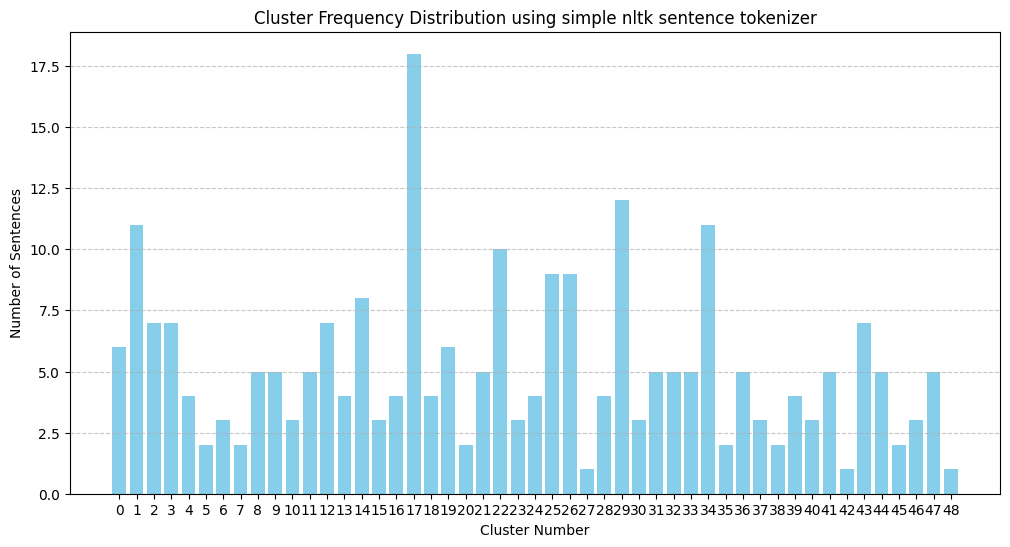

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
clusters = kmeans.labels_
cluster_distribution = Counter(clusters)

cluster_numbers = list(cluster_distribution.keys())
frequencies = list(cluster_distribution.values())

plt.figure(figsize=(12, 6))
plt.bar(cluster_numbers, frequencies, color='skyblue')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Sentences')
plt.title('Cluster Frequency Distribution using simple nltk sentence tokenizer')
plt.xticks(cluster_numbers)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

X = 10

def expand_sentence_with_ngram(text, target_words, X):

    expanded_sentences = []
    words = word_tokenize(text)

    for i in range(len(words)):
        for target in target_words:
            ngram_len = len(target.split())
            if ' '.join(words[i:i + ngram_len]).lower() == target.lower():
                start_index = max(0, i - X)
                end_index = min(len(words), i + ngram_len + X)
                expanded_sentence = ' '.join(words[start_index:end_index])
                expanded_sentences.append(expanded_sentence)
                break

    return expanded_sentences

def process_texts_with_expansion(comments, posts, target_words, X):
    comments_expanded = []
    posts_expanded = []

    for comment in comments:
        comments_expanded.extend(expand_sentence_with_ngram(comment, target_words, X))

    for post in posts:
        posts_expanded.extend(expand_sentence_with_ngram(post, target_words, X))

    all_sentences_expanded = comments_expanded + posts_expanded
    return all_sentences_expanded

expanded_sentences = process_texts_with_expansion(comments, posts, target_emotional_reasoning, X)

print(expanded_sentences[:5])


["it seems that you are in a rough spot . But I feel that if there 's anything worth noting its the Stockdale", '( and iâ\x80\x99m saying this from a disadvantaged sch ) but i feel like we should at least be allowed to remove p3', "should just sacrifice studying for the remaining prelim papers now because i feel there 's no point plus im just too tired to", ') Also right same , ppl think I study alot but I feel like I should be studying every second of the day', '. sometimes im scared to go to the basketball court because it feels like they would laugh at me for trying a new']


In [ ]:
expanded_sentences

["it seems that you are in a rough spot . But I feel that if there 's anything worth noting its the Stockdale",
 '( and iâ\x80\x99m saying this from a disadvantaged sch ) but i feel like we should at least be allowed to remove p3',
 "should just sacrifice studying for the remaining prelim papers now because i feel there 's no point plus im just too tired to",
 ') Also right same , ppl think I study alot but I feel like I should be studying every second of the day',
 '. sometimes im scared to go to the basketball court because it feels like they would laugh at me for trying a new',
 'be the 2021 batch . chem same issue as physics but I feel that the notes are better . teachers are better too',
 'do those 2 papers within 1 day to practise . But I feel that it would only be meaningful if you already understand',
 'I dont like it LOL . Not to that extent but I feel like you are exaggerating anyway . It should be valid',
 'of their batchmates . ( but ironically youâ\x80\x99re not alone beca

In [ ]:
embeddings_total_2 = model.encode(expanded_sentences)

In [ ]:
k_range = range(10, 50)
optimal_k_new, scores_new = find_optimal_clusters(embeddings_total_2, k_range)
print(f'Optimal number of clusters: {optimal_k_new}')

Optimal number of clusters: 49


In [ ]:

kmeans_new = KMeans(n_clusters=optimal_k_new, random_state=42).fit(embeddings_total_2)

random_sentences_from_clusters_new = get_random_sentences_from_clusters(expanded_sentences, kmeans_new.labels_)

closest_sentences_to_centroids_new = get_closest_sentences_to_centroids(embeddings_total_2, expanded_sentences, kmeans_new)

# print("Random Sentences from Each Cluster:")
# for cluster, sentences in random_sentences_from_clusters_new.items():
#     print(f"Cluster {cluster}:")
#     for sentence in sentences:
#         print(f" - {sentence}")

# print("\nSentences Closest to the Centroid of Each Cluster:")
# for cluster, sentences in closest_sentences_to_centroids_new.items():
#     print(f"Cluster {cluster}:")
#     for sentence in sentences:
#         print(f" - {sentence}")


In [ ]:

df_clusters_new = create_cluster_dataframe(random_sentences_from_clusters_new, closest_sentences_to_centroids_new)

embeddings_total_2 = model.encode(expanded_sentences)
df_clusters_new

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_clusters_new)

https://docs.google.com/spreadsheets/d/1hIrbK_EQzgBDN2JKmfWg_vXLPuH70XhfVe31-z1PTmA#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


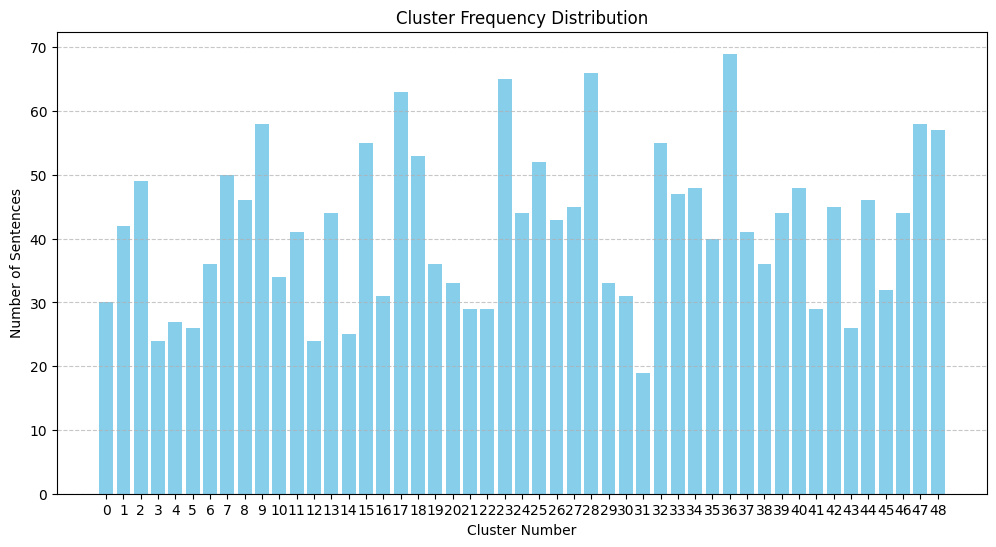

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
clusters_new = kmeans_new.labels_
cluster_distribution_new = Counter(clusters_new)

cluster_numbers_new = list(cluster_distribution_new.keys())
frequencies_new = list(cluster_distribution_new.values())

plt.figure(figsize=(12, 6))
plt.bar(cluster_numbers_new, frequencies_new, color='skyblue')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Sentences')
plt.title('Cluster Frequency Distribution using fixed window size')
plt.xticks(cluster_numbers_new)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

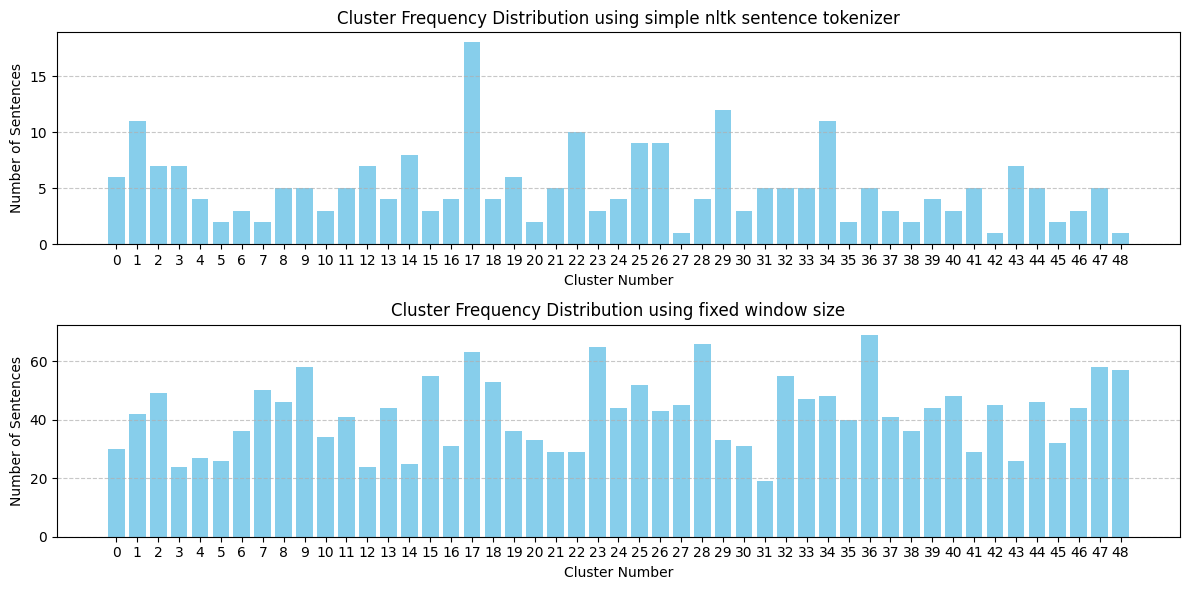

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

clusters = kmeans.labels_
cluster_distribution = Counter(clusters)

cluster_numbers = list(cluster_distribution.keys())
frequencies = list(cluster_distribution.values())

clusters_new = kmeans_new.labels_
cluster_distribution_new = Counter(clusters_new)
cluster_numbers_new = list(cluster_distribution_new.keys())
frequencies_new = list(cluster_distribution_new.values())

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

axs[0].bar(cluster_numbers, frequencies, color='skyblue')
axs[0].set_xlabel('Cluster Number')
axs[0].set_ylabel('Number of Sentences')
axs[0].set_title('Cluster Frequency Distribution using simple nltk sentence tokenizer')
axs[0].set_xticks(cluster_numbers)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

axs[1].bar(cluster_numbers_new, frequencies_new, color='skyblue')
axs[1].set_xlabel('Cluster Number')
axs[1].set_ylabel('Number of Sentences')
axs[1].set_title('Cluster Frequency Distribution using fixed window size')
axs[1].set_xticks(cluster_numbers_new)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
comments = data_comments_original_sgexams['body'].dropna().astype(str).tolist()
posts_t = data_posts_original_sgexams['title'].dropna().astype(str).tolist()
posts_b = data_posts_original_sgexams['body'].dropna().astype(str).tolist()
comments2 = data_comments_original_teen['body'].dropna().astype(str).tolist()
posts_t2 = data_posts_original_teen['title'].dropna().astype(str).tolist()
posts_b2 = data_posts_original_teen['body'].dropna().astype(str).tolist()

In [ ]:

import nltk
from nltk.tokenize import word_tokenize

#initial value of X
X = 10

def expand_sentence_with_ngram_per_comment_or_post(text, target_words, X):

    expanded_sentences = []
    words = word_tokenize(text)

    for i in range(len(words)):
        for target in target_words:

            ngram_len = len(target.split())
            if ' '.join(words[i:i + ngram_len]).lower() == target.lower():

                start_index = max(0, i - X)

                end_index = min(len(words), i + ngram_len + X)

                expanded_sentence = ' '.join(words[start_index:end_index])
                expanded_sentences.append(expanded_sentence)
                break

    return expanded_sentences

def process_texts_with_expansion(comments, posts_t, posts_b, target_words, X):
    """
    Process both comments and posts, expanding sentences containing the target n-grams.
    This function handles two separate datasets and merges the results.
    """
    comments_expanded = []
    posts_t_expanded = []
    posts_b_expanded = []

    for comment in comments:
        comments_expanded.extend(expand_sentence_with_ngram_per_comment_or_post(comment, target_words, X))

    for post in posts_t:
        posts_t_expanded.extend(expand_sentence_with_ngram_per_comment_or_post(posts_t, target_words, X))
    for post in posts_b:
        posts_b_expanded.extend(expand_sentence_with_ngram_per_comment_or_post(posts_b, target_words, X))

    return comments_expanded + posts_t_expanded + posts_b_expanded

comments_expanded_1 = process_texts_with_expansion(comments, posts_t, posts_b, target_emotional_reasoning, X)
comments_expanded_2 = process_texts_with_expansion(comments2, posts_t2, posts_b2, target_emotional_reasoning, X)

all_expanded_sentences = comments_expanded_1 + comments_expanded_2

print(all_expanded_sentences[:10])


TypeError: expected string or bytes-like object

In [ ]:
embeddings_total_3 = model.encode(all_expanded_sentences)

In [ ]:
k_range = range(10, 50)
optimal_k_new_2, scores_new = find_optimal_clusters(embeddings_total_3, k_range)
print(f'Optimal number of clusters: {optimal_k_new_2}')

In [ ]:

kmeans_new_2 = KMeans(n_clusters=optimal_k_new, random_state=42).fit(embeddings_total_3)

random_sentences_from_clusters_new_2 = get_random_sentences_from_clusters(all_expanded_sentences, kmeans_new_2.labels_)

closest_sentences_to_centroids_new_2 = get_closest_sentences_to_centroids(embeddings_total_3, all_expanded_sentences, kmeans_new_2)


In [ ]:

df_clusters_new_2 = create_cluster_dataframe(random_sentences_from_clusters_new_2, closest_sentences_to_centroids_new_2)
df_clusters_new_2

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
clusters_new_2 = kmeans_new_2.labels_
cluster_distribution_new_2 = Counter(clusters_new_2)

cluster_numbers_new_2 = list(cluster_distribution_new_2.keys())
frequencies_new_2 = list(cluster_distribution_new_2.values())

plt.figure(figsize=(12, 6))
plt.bar(cluster_numbers_new_2, frequencies_new_2, color='skyblue')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Sentences')
plt.title('Cluster Frequency Distribution using fixed window size')
plt.xticks(cluster_numbers_new_2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
target_emotional_reasoning_from_posts = np.array([11., 10., 14., 10., 10.,  9.,  3.,  6.,  6.,  2.,  5.,  5.,  7.,
        2.,  5.,  6.,  8.,  5.,  7.,  3.,  6.,  2.,  3.,  8.,  5.,  3.,
       12.,  3.,  5.,  5.,  2.,  2.,  2.,  7., 14.,  3.,  6.,  2.,  4.,
       16.,  7.,  5.,  6.,  6.,  4.,  1.,  7.,  2.,  5.,  3.,  1.,  5.,
        8.,  5.,  4.,  6.,  3.,  8.,  3.,  2.,  3.,  3.,  4.,  4.,  2.,
        1.,  5.,  7.,  2.,  2.,  1.,  2.,  0.,  4.,  4.,  7.,  3.,  2.,
        2.,  6.,  5.,  3.,  3.,  3.,  3.,  8.,  7.,  5.,  4.,  3.,  4.,
        8.,  2.,  3.,  3.,  1.,  2.,  0.,  6., 15.,  9., 11.,  8.,  5.,
        9.,  6.,  3.,  3.,  3.,  4.,  1.,  3.,  0.,  4.,  1.,  3.,  3.,
        3.,  3.,  0.,  6.,  3.,  4.,  1.,  2.,  5.,  3.,  6.,  2.,  4.,
        5.,  0.,  1.,  4.,  5.,  2.,  4.,  1.,  4.,  2.,  3.,  6.,  6.,
        6.,  4.,  1.,  1.,  1.,  1.,  2.,  4.,  5.,  4.,  5.,  6., 12.,
        9.,  6.,  1.,  2.,  5.,  2.,  3.,  3.,  2.,  4.,  1.,  1.,  4.,
        4.,  1.,  3.,  1.,  2.,  9.,  1.,  2.,  3.,  1.,  3.,  2.,  2.,
        2.,  1.,  2.,  0.,  3.,  0.,  0.,  1.,  3.,  0.,  0.,  1.,  2.,
        6.,  2.,  2.,  1.,  0.,  1.,  0.,  1.,  1.,  5.,  5.,  3.,  2.,
        0.,  0.,  1.,  3.,  4.,  0.,  1.,  4.,  3.,  0.,  0.,  0.,  0.,
        2.,  2.,  0.,  2.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])
target_emotional_reasoning_part1 = np.array([0., 1., 2., 3., 1., 5., 1., 1., 0., 0., 1., 2., 1., 0., 0., 3., 0.,
       2., 1., 2., 2., 2., 3., 2., 1., 1., 3., 0., 2., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 4., 1., 2., 2., 0., 0., 0., 1., 3., 0., 6., 3.,
       2., 2., 2., 0., 0., 0., 3., 1., 0., 1., 2., 0., 0., 2., 1., 1., 0.,
       1., 1., 3., 1., 2., 2., 2., 0., 0., 1., 1., 1., 0., 1., 0., 0., 2.,
       1., 1., 0., 2., 2., 0., 4., 3., 0., 1., 0., 1., 1., 0., 5., 5., 1.,
       6., 4., 1., 1., 4., 0., 1., 3., 0., 0., 2., 0., 0., 1., 0., 2., 1.,
       2., 1., 0., 3., 0., 3., 2., 0., 2., 2., 0., 1., 0., 2., 0., 0., 2.,
       1., 2., 4., 0., 1., 0., 0., 3., 3., 0., 0., 0., 1., 3., 0., 1., 3.,
       2., 4., 3., 1., 4., 4., 1., 1., 3., 1., 0., 1., 0., 0., 2., 1., 0.,
       0., 0., 0., 2., 1., 2., 3., 1., 1., 1., 3., 2., 1., 2., 2., 0., 0.,
       0., 3., 0., 1., 1., 2., 0., 0., 1., 2., 0., 0., 0., 0., 1., 0., 3.,
       1., 8., 5., 1., 0., 1., 0., 1., 2., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 2., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.])
target_emotional_reasoning_part2 = np.array([3., 2., 1., 1., 1., 5., 2., 4., 1., 0., 8., 2., 1., 2., 0., 1., 3.,
       3., 0., 0., 4., 2., 1., 4., 1., 0., 1., 3., 0., 0., 0., 5., 0., 5.,
       3., 1., 2., 3., 0., 9., 0., 2., 1., 1., 0., 1., 2., 0., 2., 3., 9.,
       3., 2., 0., 1., 2., 4., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 5.,
       0., 1., 1., 2., 2., 3., 1., 1., 0., 1., 0., 2., 1., 1., 1., 2., 0.,
       0., 1., 2., 1., 0., 1., 2., 0., 0., 2., 1., 0., 3., 2., 3., 2., 2.,
       1., 3., 3., 3., 0., 1., 1., 2., 0., 2., 0., 0., 1., 0., 1., 0., 3.,
       0., 1., 0., 1., 3., 1., 0., 4., 0., 0., 0., 2., 1., 0., 1., 2., 3.,
       0., 2., 3., 0., 0., 2., 1., 5., 2., 1., 1., 1., 0., 0., 2., 1., 2.,
       5., 8., 2., 3., 1., 2., 1., 2., 1., 0., 0., 0., 3., 0., 0., 0., 1.,
       0., 0., 0., 4., 0., 2., 1., 0., 2., 3., 2., 1., 0., 2., 0., 1., 2.,
       3., 2., 2., 2., 1., 1., 0., 0., 5., 1., 1., 0., 0., 1., 0., 0., 1.,
       5., 0., 1., 2., 0., 0., 1., 0., 2., 0., 0., 0., 2., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.])
target_emotional_reasoning_part3 = np.array([3., 6., 5., 3., 3., 2., 3., 4., 1., 4., 1., 5., 1., 2., 0., 2., 2.,
       1., 4., 2., 2., 1., 2., 0., 1., 0., 0., 3., 2., 1., 2., 1., 1., 0.,
       1., 2., 0., 0., 5., 6., 0., 0., 1., 1., 0., 0., 1., 3., 2., 2., 1.,
       3., 3., 1., 0., 4., 1., 2., 0., 2., 0., 2., 1., 1., 2., 1., 0., 0.,
       1., 1., 0., 1., 0., 2., 1., 2., 0., 1., 0., 3., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 2., 2., 1., 0., 1., 0., 1., 1., 1., 4., 3., 1.,
       5., 1., 4., 3., 3., 1., 2., 0., 1., 2., 1., 2., 1., 2., 1., 3., 1.,
       0., 0., 1., 1., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       2., 0., 4., 0., 0., 3., 2., 2., 1., 0., 1., 0., 0., 1., 1., 4., 1.,
        2., 2., 4., 0., 1., 0., 1., 1., 2., 0., 1., 0., 0., 0., 1., 0., 1.,
        3., 2., 0., 0., 2., 1., 0., 1., 3., 1., 3., 2., 2., 4., 3., 1., 0.,
        0., 1., 1., 3., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 1., 0., 0.,
        2., 1., 0., 3., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 2., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 2., 0., 0., 0., 0., 0., 1., 0.])
target_emotional_reasoning_part4 = np.array([4., 2., 0., 2., 0., 2., 2., 4., 1., 2., 4., 1., 2., 1., 3., 1., 0.,
        1., 0., 1., 2., 0., 1., 0., 1., 2., 3., 0., 0., 2., 1., 0., 0., 0.,
        3., 2., 5., 3., 0., 4., 1., 4., 1., 0., 0., 0., 3., 3., 2., 2., 4.,
        2., 0., 2., 1., 0., 2., 0., 1., 3., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 3., 0., 1., 0., 3., 1., 1., 1., 0., 1., 2., 1., 1., 0., 0., 0.,
        1., 1., 2., 5., 3., 0., 2., 1., 2., 1., 4., 0., 1., 2., 3., 4., 2.,
        2., 5., 4., 2., 2., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 2., 0.,
        1., 1., 0., 2., 2., 0., 1., 0., 1., 3., 1., 0., 0., 2., 1., 0., 0.,
        0., 2., 1., 0., 1., 2., 2., 4., 3., 4., 0., 1., 0., 0., 3., 3., 6.,
        1., 1., 5., 6., 4., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
        0., 2., 1., 0., 0., 1., 1., 3., 3., 2., 0., 2., 0., 0., 0., 0., 0.,
        1., 0., 0., 2., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        4., 1., 7., 4., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 3., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 2., 0., 0., 0., 0., 1., 0., 1., 0.])
emotional_reasoning = target_emotional_reasoning_from_posts + target_emotional_reasoning_part1 + target_emotional_reasoning_part2 + target_emotional_reasoning_part3 + target_emotional_reasoning_part4
x = np.sum(emotional_reasoning)
x


2048.0

In [ ]:
target_emotional_reasoning_from_posts = np.array([0., 0., 0., 0., 0., 0., 0., 2., 2., 1., 2., 1., 4., 1., 1., 3., 3.,
       5., 2., 3., 1., 6., 3., 4., 1., 2., 4., 1., 2., 3., 3., 0., 3., 1.,
       5., 3., 3., 0., 1., 2., 1., 1., 4., 2., 4., 1., 1., 0., 2., 2., 3.,
       3., 1., 2., 3., 1., 3., 0., 0., 1., 1., 1., 1., 2., 0., 2., 2., 4.,
       3., 1., 1., 0., 1., 1., 0., 0., 2., 0., 1., 3., 2., 4., 4., 0., 0.,
       0., 0., 1., 2., 4., 3., 3., 3., 2., 3., 3., 1., 6., 1., 2., 1., 0.,
       1., 2., 3., 0., 1., 0., 2., 1., 0., 2., 2., 0., 3., 1., 1., 2., 2.,
       2., 0., 0., 0., 1., 0., 0., 1., 1., 1., 3., 3., 4., 5., 1., 2., 3.,
       1., 0., 2., 2., 3., 1., 1., 4., 5., 1., 2., 2., 2., 3., 2., 1., 1.,
       2., 1., 2., 1., 2., 1., 1., 3., 0., 1., 1., 2., 2., 2., 2., 0., 1.,
       0., 2., 0., 0., 4., 1., 3., 3., 0., 5., 1., 3., 3., 2., 1., 6., 0.,
       2., 1., 2., 3., 0., 2., 2., 0., 0., 2., 0., 4., 2., 2., 0., 2., 2.,
       3., 0., 3., 2., 1., 0., 2., 0., 0., 1., 1., 0., 4., 2., 2., 0., 1.,
       0., 3., 1., 1., 0., 0., 1., 1., 0., 0., 1., 5., 5., 4., 1., 0., 1.,
       0., 1., 5., 1., 1., 4., 3., 0., 2., 2., 2., 0., 0., 1., 4., 0., 2.,
       1., 1., 3., 0., 0., 1., 3., 1., 1., 0., 0.])
target_emotional_reasoning_part1 = np.array([0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 3., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 2., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 2., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 2., 1.,
       0., 0., 2., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 3., 0., 3., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 2., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
target_emotional_reasoning_part2 = np.array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 3., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 2., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 2., 2., 2., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
target_emotional_reasoning_part3 = np.array([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 3., 1., 3., 2., 1., 0.,
       0., 0., 3., 1., 2., 1., 1., 3., 1., 0., 0., 2., 2., 0., 3., 2., 1.,
       0., 2., 1., 3., 3., 0., 4., 0., 3., 2., 0., 3., 1., 3., 1., 0., 1.,
       2., 0., 1., 3., 2., 1., 5., 1., 1., 1., 1., 2., 1., 1., 0., 0., 1.,
       3., 0., 0., 0., 3., 2., 1., 0., 2., 4., 2., 4., 4., 1., 3., 3., 2.,
       0., 5., 1., 1., 1., 4., 1., 2., 3., 4., 4., 3., 6., 3., 4., 0., 2.,
       4., 2., 2., 2., 5., 5., 2., 1., 1., 4., 3., 3., 1., 3., 1., 2., 2.,
       0., 5., 2., 1., 3., 1., 1., 2., 1., 0., 0., 1., 2., 0., 1., 5., 1.,
       2., 2., 1., 2., 2., 0., 1., 1., 1., 3., 0., 2., 4., 1., 1., 1., 3.,
       2., 3., 3., 0., 2., 2., 1., 2., 2., 4., 3., 1., 1., 1., 3., 0., 0.,
       2., 6., 3., 1., 0., 1., 2., 1., 1., 1., 0., 1., 4., 0., 2., 3., 2.,
       0., 2., 2., 1., 1., 2., 1., 1., 2., 0., 2., 3., 0., 2., 0., 1., 2.,
       1., 1., 3., 0., 1., 3., 4., 1., 2., 1., 0., 2., 0., 2., 0., 1., 0.,
       1., 1., 1., 0., 1., 2., 4., 4., 0., 0., 0., 1., 3., 2., 2., 3., 1.,
       2., 0., 1., 0., 1., 1., 2., 2., 3., 0., 1., 0., 0., 0., 1., 2., 0.,
       0., 0., 1., 0., 0., 0., 0., 3., 0., 0., 1.])
target_emotional_reasoning_part4 = np.array([0., 0., 0., 0., 0., 0., 0., 0., 3., 1., 2., 3., 3., 3., 0., 3., 3.,
       1., 2., 3., 2., 0., 1., 2., 7., 2., 4., 3., 3., 1., 2., 2., 0., 1.,
       2., 5., 2., 2., 4., 3., 2., 5., 1., 3., 0., 1., 0., 5., 3., 2., 0.,
       1., 5., 1., 3., 2., 2., 5., 1., 2., 1., 2., 1., 5., 2., 2., 1., 1.,
       0., 1., 0., 3., 2., 0., 0., 3., 1., 2., 5., 4., 1., 2., 4., 3., 1.,
       2., 2., 2., 1., 3., 4., 4., 3., 2., 2., 0., 3., 3., 2., 3., 3., 0.,
       1., 3., 5., 3., 2., 8., 4., 1., 0., 3., 1., 3., 2., 1., 1., 2., 1.,
       1., 3., 1., 5., 3., 2., 3., 0., 2., 2., 2., 2., 1., 1., 0., 3., 1.,
       1., 2., 1., 0., 0., 0., 4., 2., 0., 3., 4., 0., 0., 1., 2., 2., 1.,
       1., 1., 2., 1., 0., 1., 1., 2., 1., 0., 2., 2., 1., 0., 0., 2., 1.,
       2., 3., 2., 1., 1., 3., 2., 1., 0., 1., 0., 1., 0., 1., 1., 0., 2.,
       0., 1., 3., 2., 3., 0., 1., 1., 1., 1., 0., 3., 2., 4., 1., 1., 2.,
       1., 0., 1., 2., 0., 1., 3., 1., 2., 0., 0., 0., 0., 3., 0., 1., 1.,
       1., 0., 1., 2., 0., 0., 0., 1., 0., 1., 4., 3., 2., 2., 1., 1., 0.,
       0., 1., 0., 1., 0., 2., 2., 1., 4., 1., 2., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 2., 0., 0., 0.])
emotional_reasoning1 = target_emotional_reasoning_from_posts + target_emotional_reasoning_part1 + target_emotional_reasoning_part2 + target_emotional_reasoning_part3 + target_emotional_reasoning_part4
k = np.sum(emotional_reasoning1)
k

1427.0